In [1]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_csv('placement-dataset.csv')

In [20]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
#STEPS:
# 0) Preprocessing + EDA + Feature Selection
# 1) Extract Input and Output Columns
# 2) Scale the Values
# 3) Train Test Split
# 4) Train the Model
# 5) Evaluate the Model/Model Selection
# 6) Deploy The Model

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [26]:
df = df.iloc[:,1:]

In [28]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [32]:
import matplotlib.pyplot as plt

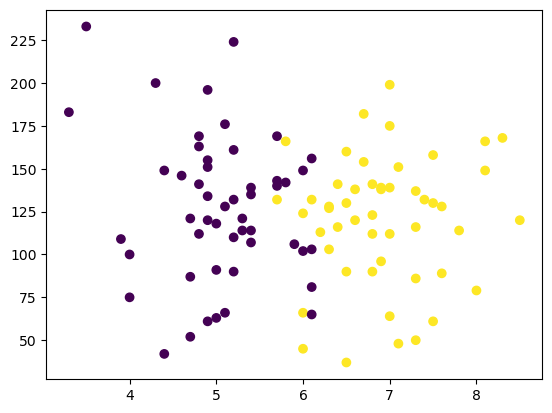

In [40]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [42]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [44]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [48]:

y.shape

(100,)

In [50]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1)

In [54]:
X_train

,cgpa,iq
98,6.3,103.0
64,7.0,64.0
74,6.7,154.0
11,6.9,138.0
75,4.8,169.0
...,...,...
92,5.2,110.0
17,3.3,183.0
50,3.5,233.0
5,7.1,48.0


In [56]:
y_train

98    1
64    1
74    1
11    1
75    0
     ..
92    0
17    0
50    0
5     1
99    1
Name: placement, Length: 90, dtype: int64

In [58]:

from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)

In [66]:
X_train

array([[ 0.25395788, -0.48995606],
       [ 0.85543708, -1.43383408],
       [ 0.59766028,  0.74434597],
       [ 0.76951148,  0.35711396],
       [-1.0349261 ,  1.10737598],
       [-0.77714931,  0.11509396],
       [ 0.33988348, -0.17533005],
       [-1.1208517 , -0.87718806],
       [-0.51937251,  0.28450796],
       [ 1.28506507, -1.50644008],
       [ 1.11321387,  0.33291196],
       [-1.7223309 , -0.56256206],
       [-0.69122371,  0.21190196],
       [-0.51937251, -0.22373405],
       [ 1.97246986,  1.08317398],
       [-0.51937251, -0.39314805],
       [ 0.68358588, -0.27213805],
       [-0.60529811, -0.05432005],
       [ 1.11321387, -0.17533005],
       [-1.1208517 , -1.72425808],
       [ 0.85543708,  0.38131596],
       [-0.69122371,  2.43848601],
       [-0.77714931, -1.38543008],
       [-0.00381892, -0.51415806],
       [-0.86307491, -0.78038006],
       [-0.94900051,  0.76854797],
       [ 1.11321387, -1.77266209],
       [ 0.68358588, -0.00591604],
       [-0.08974451,

In [70]:
X_test = scaler.transform(X_test)

In [72]:
X_test

array([[ 0.42580908, -0.80458206],
       [-0.17567011,  0.45392197],
       [-0.94900051, -0.07852205],
       [-0.26159571,  0.21190196],
       [ 0.08210668, -0.48995606],
       [-0.60529811, -0.22373405],
       [ 0.94136267,  0.67173997],
       [-0.69122371,  0.91375998],
       [ 1.19913947,  0.21190196],
       [-1.1208517 , -0.05432005]])

In [74]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression()

In [78]:
clf.fit(X_train,y_train)

LogisticRegression()

In [80]:
y_pred = clf.predict(X_test)

In [82]:
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [84]:
y_test

79    1
4     0
22    0
87    1
14    0
46    0
21    1
47    0
3     1
24    0
Name: placement, dtype: int64

In [86]:

from sklearn.metrics import accuracy_score

In [88]:
accuracy_score(y_test,y_pred)

0.8

In [92]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

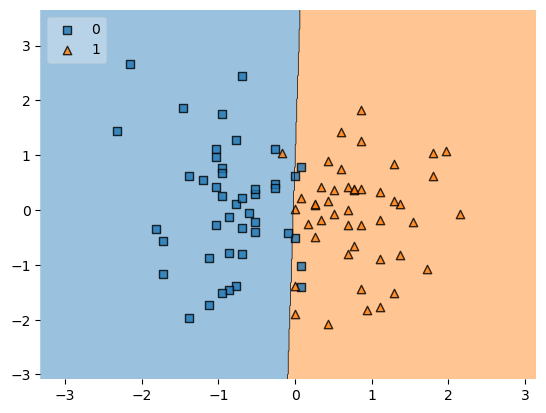

In [94]:
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [96]:
import pickle

In [98]:
pickle.dump(clf,open('model.pkl', 'wb'))